In [1]:
import graphviz
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from lab_1_utils import get_iris_dataset, print_decorated, get_data_and_target_arrays

In [3]:
# load Iris dataset
iris = get_iris_dataset()
iris


#######################################################################################
IRIS DATASET LOADED
Examples :  species
setosa        50
versicolor    50
virginica     50
dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [4]:
# X = data without the class feature (target, species): ID, features
# Y = data with the class (0, 1, 2) (setosa, versicolor, virginica)
[X, Y] = get_data_and_target_arrays(iris)
print(X)
print(Y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0.0
1      0.0
2      0.0
3      

In [5]:
# split in Training Set and Test Set
# 130 examples in Training Set
# 20 examples in Test Set (test_size=20)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=20,
                                                    random_state=300)
print_decorated("TRAINING SET (X_train), number of examples", len(X_train))
print_decorated("TEST SET (X_test), number of examples = ", len(X_test))


#######################################################################################
TRAINING SET (X_train), number of examples :  130

#######################################################################################
TEST SET (X_test), number of examples =  :  20


In [6]:
# initialization to build a decision tree classifier
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=300,
                                  min_samples_leaf=5,
                                  class_weight={0: 1, 1: 1, 2: 1})

In [7]:
# fitting the model based on the training data (X_train, Y_train)
clf = clf.fit(X_train, Y_train)

In [8]:
# predictions on Trainig Set and Test Set
training_prediction = clf.predict(X_train)  # predizioni sul training set
print_decorated("Training Predictions", training_prediction)
test_prediction = clf.predict(X_test)  # predizioni sul test set
print_decorated("Test Predictions", test_prediction)


#######################################################################################
Training Predictions :  [0. 0. 2. 0. 2. 0. 1. 2. 0. 2. 2. 2. 0. 1. 1. 1. 2. 0. 2. 1. 1. 1. 2. 1.
 2. 2. 2. 1. 0. 1. 2. 2. 0. 0. 1. 2. 0. 2. 1. 2. 0. 1. 2. 1. 0. 2. 0. 0.
 2. 0. 0. 1. 0. 1. 0. 1. 0. 1. 2. 1. 0. 1. 0. 2. 0. 1. 2. 2. 2. 2. 1. 0.
 0. 2. 2. 2. 0. 0. 1. 1. 1. 0. 0. 2. 0. 0. 0. 2. 2. 2. 1. 0. 2. 0. 1. 0.
 2. 2. 1. 0. 1. 1. 0. 2. 0. 0. 2. 1. 0. 2. 1. 2. 1. 1. 2. 2. 2. 1. 1. 1.
 2. 1. 2. 2. 1. 0. 2. 1. 0. 2.]

#######################################################################################
Test Predictions :  [2. 2. 1. 1. 1. 0. 2. 0. 1. 1. 0. 0. 2. 0. 0. 1. 0. 0. 1. 1.]


In [9]:
# classification report (precision, recall ad F1 Score) on Training Set and Test Set
print_decorated("TRAINING SET: Precision, Recall, F1 Score\n",
                (metrics.classification_report(Y_train, training_prediction, digits=3)))

print_decorated("TESTING SET: Precision, Recall, F1 Score\n",
                (metrics.classification_report(Y_test, test_prediction, digits=3)))


#######################################################################################
TRAINING SET: Precision, Recall, F1 Score
 :                precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        42
         1.0      1.000     0.930     0.964        43
         2.0      0.938     1.000     0.968        45

    accuracy                          0.977       130
   macro avg      0.979     0.977     0.977       130
weighted avg      0.978     0.977     0.977       130


#######################################################################################
TESTING: Precision, Recall, F1 Score
 :                precision    recall  f1-score   support

         0.0      1.000     1.000     1.000         8
         1.0      0.875     1.000     0.933         7
         2.0      1.000     0.800     0.889         5

    accuracy                          0.950        20
   macro avg      0.958     0.933     0.941        20
weighted avg      0.956     

In [10]:
# confusion matrix on Training Set and Test Set
print_decorated("TRAINING SET: Confusion matrix\n", metrics.confusion_matrix(Y_train, training_prediction))
print_decorated("TESTING TEST: Confusion matrix\n", metrics.confusion_matrix(Y_test, test_prediction))


#######################################################################################
TRAINING Confusion matrix
 :  [[42  0  0]
 [ 0 40  3]
 [ 0  0 45]]

#######################################################################################
TESTING Confusion matrix
 :  [[8 0 0]
 [0 7 0]
 [0 1 4]]


In [11]:
# Exercise 1: oversampling and artificial inflation
# load Iris dataset
iris = get_iris_dataset()
iris


#######################################################################################
IRIS DATASET LOADED
Examples :  species
setosa        50
versicolor    50
virginica     50
dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [12]:
# add 450 examples to Iris dataset
# extract examples associated with the class "virginica" from the dataset
versicolor_examples = iris.loc[iris["species"] == "virginica"]
# for each example add 10 copies of the example in the dataset (oversampling and artificial inflation)
for index, row in versicolor_examples.iterrows():
    for x in range(0, 9):
        iris_data_length = len(iris.index)
        artificial_inflation_row = pd.DataFrame([
            [
                row['sepal length (cm)'],
                row['sepal width (cm)'],
                row['petal length (cm)'],
                row['petal width (cm)'],
                row['target'],
                row['species'],
            ]
        ], columns=iris.columns, index= [iris_data_length])

        iris = pd.concat([iris, artificial_inflation_row])
print(iris)
print_decorated("New Iris Dataset with oversamplig viriginica examples" ,iris.groupby('species').size())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
595                5.9               3.0                5.1               1.8   
596                5.9               3.0                5.1               1.8   
597                5.9               3.0                5.1               1.8   
598                5.9               3.0                5.1               1.8   
599                5.9               3.0                5.1               1.8   

     target    species  
0 

In [13]:
# X = data without the class feature (target, species): ID, features
# Y = data with the class (0, 1, 2) (setosa, versicolor, virginica)
[X, Y] = get_data_and_target_arrays(iris)
# split in Training Set and Test Set
# 580 examples in Training Set
# 20 examples in Test Set (test_size=20)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=20,
                                                    random_state=42)
print_decorated("TRAINING SET (X_train), number of examples", len(X_train))
print_decorated("TEST SET (X_test), number of examples = ", len(X_test))


#######################################################################################
TRAINING SET (X_train), number of examples :  580

#######################################################################################
TEST SET (X_test), number of examples =  :  20


In [14]:
# initialization to build a decision tree classifier
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=300,
                                  min_samples_leaf=5,
                                  class_weight={0: 1, 1: 1, 2: 1})

# fitting the model based on the training data (X_train, Y_train)
clf = clf.fit(X_train, Y_train)

In [15]:
# predictions on Trainig Set and Test Set
training_prediction = clf.predict(X_train)
test_prediction = clf.predict(X_test)
print_decorated("Test Predictions", test_prediction)


#######################################################################################
Test Predictions :  [2. 2. 2. 2. 2. 2. 0. 2. 1. 2. 1. 2. 2. 2. 2. 2. 0. 2. 2. 1.]


In [16]:
# classification report (precision, recall ad F1 Score) on Training Set and Test Set
print(metrics.classification_report(Y_train, training_prediction, digits=3))
print(metrics.classification_report(Y_test, test_prediction, digits=3))

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        48
         1.0      1.000     0.891     0.943        46
         2.0      0.990     1.000     0.995       486

    accuracy                          0.991       580
   macro avg      0.997     0.964     0.979       580
weighted avg      0.991     0.991     0.991       580

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000         2
         1.0      1.000     0.750     0.857         4
         2.0      0.933     1.000     0.966        14

    accuracy                          0.950        20
   macro avg      0.978     0.917     0.941        20
weighted avg      0.953     0.950     0.947        20



In [17]:
# confusion matrix on Training Set and Test Set
print_decorated("TRAINING SET: Confusion matrix\n", metrics.confusion_matrix(Y_train, training_prediction))
print_decorated("TESTING SET: Confusion matrix\n", metrics.confusion_matrix(Y_test, test_prediction))


#######################################################################################
TRAINING SET: Confusion matrix
 :  [[ 48   0   0]
 [  0  41   5]
 [  0   0 486]]

#######################################################################################
TESTING SET: Confusion matrix
 :  [[ 2  0  0]
 [ 0  3  1]
 [ 0  0 14]]


In [18]:
# Exercise 2: oversampling and artificial inflation with weight gain 
# give a weight of 10 to the class "virginica"
# load Iris dataset
iris = get_iris_dataset()
[X, Y] = get_data_and_target_arrays(iris)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=20, random_state=42)


#######################################################################################
IRIS DATASET LOADED
Examples :  species
setosa        50
versicolor    50
virginica     50
dtype: int64


In [19]:
# initialization to build a decision tree classifier

# give a weight of 10 to the class "virginica"
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=300,
                                  min_samples_leaf=5,
                                  class_weight={0: 1, 1: 1, 2: 10})

In [20]:
# fitting the model based on the training data (X_train, Y_train)
clf = clf.fit(X_train, Y_train)

In [21]:
# predictions on Trainig Set and Test Set
training_prediction = clf.predict(X_train)
test_prediction = clf.predict(X_test)

In [23]:
# classification report (precision, recall ad F1 Score) on Training Set and Test Set
print(metrics.classification_report(Y_train, training_prediction, digits=3))
print(metrics.classification_report(Y_test, test_prediction, digits=3))

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        44
         1.0      1.000     0.829     0.907        41
         2.0      0.865     1.000     0.928        45

    accuracy                          0.946       130
   macro avg      0.955     0.943     0.945       130
weighted avg      0.953     0.946     0.946       130

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000         6
         1.0      1.000     0.667     0.800         9
         2.0      0.625     1.000     0.769         5

    accuracy                          0.850        20
   macro avg      0.875     0.889     0.856        20
weighted avg      0.906     0.850     0.852        20



In [24]:
# confusion matrix on Training Set and Test Set
print_decorated("TRAINING SET: Confusion matrix\n", metrics.confusion_matrix(Y_train, training_prediction))
print_decorated("TESTING SET: Confusion matrix\n", metrics.confusion_matrix(Y_test, test_prediction))


#######################################################################################
TRAINING SET: Confusion matrix
 :  [[44  0  0]
 [ 0 34  7]
 [ 0  0 45]]

#######################################################################################
TESTING SET: Confusion matrix
 :  [[6 0 0]
 [0 6 3]
 [0 0 5]]


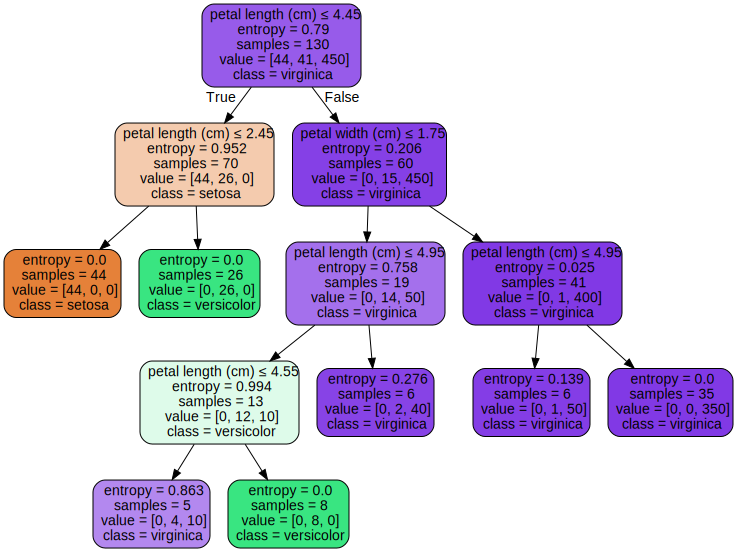

In [27]:
# view of the tree learned through training
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=list(iris.columns.drop(['target', 'species'])),
                         class_names=['setosa', 'versicolor', 'virginica'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [28]:
# Exercise 3: modify classifir hyperparameters
# example of overfitting
iris = get_iris_dataset()
[X, Y] = get_data_and_target_arrays(iris)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=20, random_state=300)


#######################################################################################
IRIS DATASET LOADED
Examples :  species
setosa        50
versicolor    50
virginica     50
dtype: int64


In [33]:
# initialization to build a decision tree classifier
# ovefitting on Training Set: min_samples_split=2
# minimum number of examples needed to divide an internal node = 2 (overfitting)
# the classifier focuses too much on the training data
clf = tree.DecisionTreeClassifier(criterion="gini",
                                  random_state=300,
                                  min_samples_split=2,
                                  class_weight={0: 1, 1: 1, 2: 1})
clf = clf.fit(X_train, Y_train)

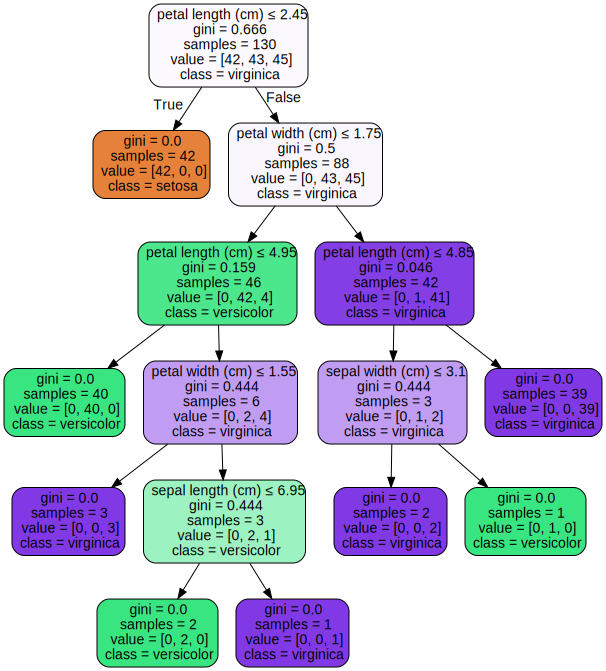

In [34]:
# view of the tree learned through training
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=list(iris.columns.drop(['target', 'species'])),
                         class_names=['setosa', 'versicolor', 'virginica'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [35]:
# Exercise 4: 
# metrics.confusion_matrix(Y_train, training_prediction)

In [36]:
# Exercise 5: Roc curves
# for each model you have to construct three curves, one for each class, considered in turn the positive class.
# constant representing classes (target)
TARGET_CLASS = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

In [37]:
# load Iris dataset
iris = get_iris_dataset()
# X = data without the class feature (target, species): ID, features
# Y = data with the class (0, 1, 2) (setosa, versicolor, virginica)
[X, Y] = get_data_and_target_arrays(iris)


#######################################################################################
IRIS DATASET LOADED
Examples :  species
setosa        50
versicolor    50
virginica     50
dtype: int64


In [39]:
from sklearn.preprocessing import label_binarize
# Make it a binary classification problem with label_binarize
print(Y.values)
# Binarize labels in a one-vs-all fashion.
y_binary = label_binarize(Y.values, classes=[0, 1, 2])
print(y_binary)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [

In [42]:
# 3 classes
n_classes = y_binary.shape[1]
print(y_binary.shape)
print(n_classes)

(150, 3)
3


In [43]:
# split in Training Set and Test Set
X_train, X_test, Y_train, Y_test = train_test_split(X, y_binary, test_size=20, random_state=300)

In [47]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
# init one vs rest classifier for decision tree classifier model
clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))

In [49]:
# fitting training data and predict class for test set
test_prediction = clf.fit(X_train, Y_train).predict(X_test)
print(test_prediction)

[[0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]]


In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for classe in range(n_classes):
    print(classe)
    # Y_test[:, 0] = get setosa prediction target
    # Y_test[:, 1] = get versicolor prediction target
    # Y_test[:, 2] = get targevirginica prediction targevirginica
    print(Y_test[:, classe])
    print(test_prediction[:, classe])
    fpr[classe], tpr[classe], _ = roc_curve(Y_test[:, classe], test_prediction[:, classe])
    roc_auc[classe] = roc_auc_score(Y_test[:, classe], test_prediction[:, classe])
    print("FPR = ", fpr[classe])
    print("TPR = ", tpr[classe])
    print("roc_auc[classe]", roc_auc[classe])
    print('###############################################')

0
[0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0]
[0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0]
FPR =  [0. 0. 1.]
TPR =  [0. 1. 1.]
roc_auc[classe] 1.0
###############################################
1
[0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1]
[0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1]
FPR =  [0.         0.07692308 1.        ]
TPR =  [0. 1. 1.]
roc_auc[classe] 0.9615384615384616
###############################################
2
[1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0]
[1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
FPR =  [0. 0. 1.]
TPR =  [0.  0.8 1. ]
roc_auc[classe] 0.9
###############################################


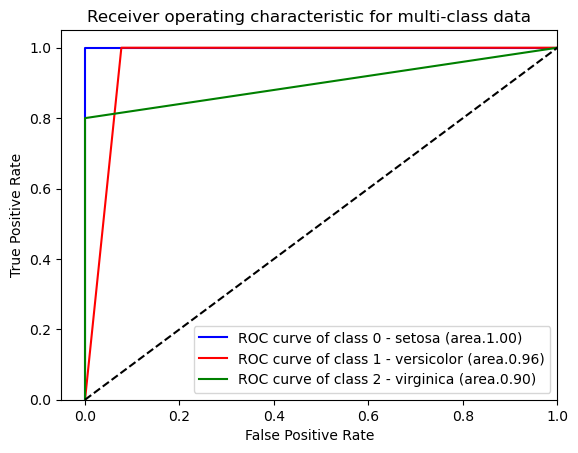

In [54]:
from itertools import cycle
from matplotlib import pyplot as plt
# draw ROC PLOT
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0} - {1} (area.{2:0.2f})'.format(i, TARGET_CLASS.get(i), roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()